In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Preprocessing and splitting data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("/Users/rooj/Documents/RP3-Main/RP3-Data/CSE-CIC-IDS2018/DoS-Related/02-15-2018.csv")  # Replace with your dataset's path

# Preview the data
print(data.head())          # View first few rows
print(data.info())          # Get summary of data types and missing values
print(data['Label'].value_counts())  # Check class distribution
print("Class distribution in the dataset:\n", data['Label'].value_counts())


   Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0         0         0  15/02/2018 08:25:18      112641158             3   
1        22         6  15/02/2018 08:29:05       37366762            14   
2     47514         6  15/02/2018 08:29:42            543             2   
3         0         0  15/02/2018 08:28:07      112640703             3   
4         0         0  15/02/2018 08:30:56      112640874             3   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             0                0                0                0   
1            12             2168             2993              712   
2             0               64                0               64   
3             0                0                0                0   
4             0                0                0                0   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean     Active Std  \
0                0  ...                 0          0.0 

In [3]:
#### Step 3: Encode the Labels ####

# Map labels to integers
label_mapping = {'Benign': 0, 'DoS attacks-GoldenEye': 1, 'DoS attacks-Slowloris': 2}
data['Label'] = data['Label'].map(label_mapping)

# Filter for relevant classes (in case there are additional classes in the dataset)
data = data[data['Label'].isin([0, 1, 2])]  # Keep only the desired classes

print("Encoded class distribution:\n", data['Label'].value_counts())




Encoded class distribution:
 Label
0    996077
1     41508
2     10990
Name: count, dtype: int64


In [4]:
###  Feature Selection

# Select relevant features for DoS detection
selected_features = [
    'Flow Duration', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Std', 
    'Pkt Size Avg', 'Flow IAT Mean'
]

# Subset the data
X = data[selected_features]
y = data['Label']

In [5]:
### Preprocess Data
 
# Handle missing values by dropping rows with NaNs
X = X.dropna()

# Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
### Split the Data into Training and Testing Sets

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


# Check the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())

X_train shape: (838860, 5)
X_test shape: (209715, 5)
y_train distribution:
 Label
0    796862
1     33206
2      8792
Name: count, dtype: int64
y_test distribution:
 Label
0    199215
1      8302
2      2198
Name: count, dtype: int64


In [7]:
### Train the Logistic Regression Model

# Initialise and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Print the model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept (Bias):", model.intercept_)


Model Coefficients: [[-0.08254846 -1.36831228 -0.8794154   4.32254814 -0.11114441]
 [-1.44940116  1.47184011  3.5273869  -4.60721218  1.04996621]
 [ 1.53194962 -0.10352783 -2.64797149  0.28466405 -0.9388218 ]]
Model Intercept (Bias): [ 1.95982274 -1.0135133  -0.94630944]


Accuracy: 0.7898338220918866
Precision (macro): 0.4283599101510472
Recall (macro): 0.7480988632009309
F1-Score (macro): 0.4585530607212837
Precision (weighted): 0.9432926781966876
Recall (weighted): 0.7898338220918866
F1-Score (weighted): 0.8471347056982812
Classification Report:
               precision    recall  f1-score   support

       Benign       0.98      0.79      0.88    199215
DoS-GoldenEye       0.17      0.76      0.27      8302
DoS-Slowloris       0.14      0.69      0.23      2198

     accuracy                           0.79    209715
    macro avg       0.43      0.75      0.46    209715
 weighted avg       0.94      0.79      0.85    209715

Confusion Matrix:
[[157814  31888   9513]
 [  1787   6303    212]
 [   675      0   1523]]


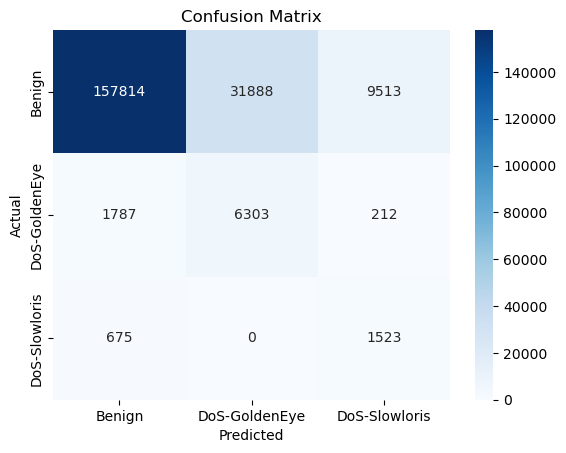

In [8]:
### Evaluate the Model

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred, average='macro'))

print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score (weighted):", f1_score(y_test, y_pred, average='weighted'))

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'DoS-GoldenEye', 'DoS-Slowloris']))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'DoS-GoldenEye', 'DoS-Slowloris'],
            yticklabels=['Benign', 'DoS-GoldenEye', 'DoS-Slowloris'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

            Feature  Coefficient
3      Pkt Size Avg     4.322548
0     Flow Duration    -0.082548
4     Flow IAT Mean    -0.111144
2   Bwd Pkt Len Std    -0.879415
1  Fwd Pkt Len Mean    -1.368312


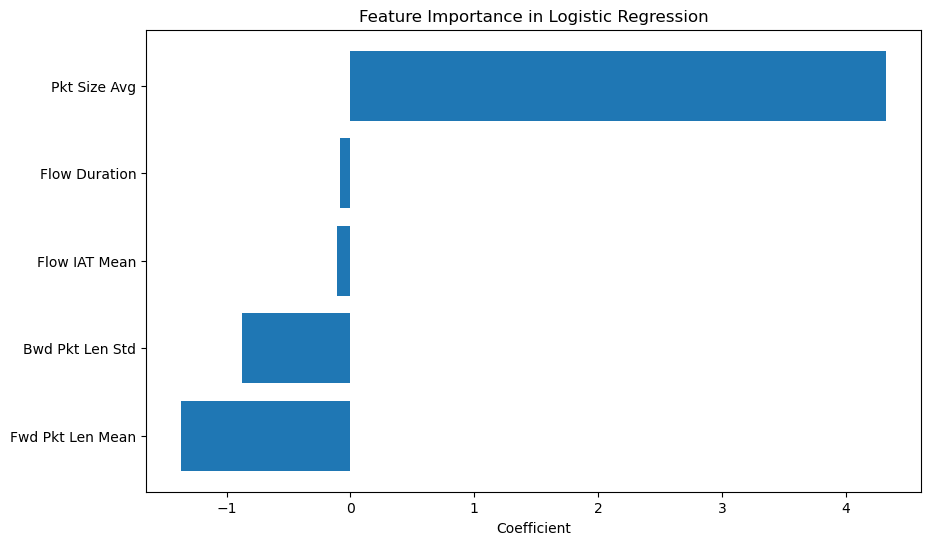

In [9]:
### Analyse Feature Importance

# Analyse feature importance using model coefficients
importance = pd.DataFrame({'Feature': selected_features, 'Coefficient': model.coef_[0]})
importance = importance.sort_values(by='Coefficient', ascending=False)
print(importance)

# Optionally, plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'], importance['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

In [10]:
### Save the Model

# Save the trained model to a file
joblib.dump(model, 'logistic_regression_T1.pkl')

# Save the scaler (to preprocess data in the same way during prediction)
joblib.dump(scaler, 'logistic_regression_T1_scaler.pkl')

print("Model and scaler saved successfully.")


##############-----------------#################-----------------#################

### Load and Use the Saved Model

# Load the saved model and scaler
loaded_model = joblib.load('logistic_regression_T1.pkl')
loaded_scaler = joblib.load('logistic_regression_T1_scaler.pkl')

# Select 100 samples from the dataset (you can customise this to focus on specific classes)
real_data = data.sample(n=1000, random_state=42)[selected_features]  # Randomly select 1000 rows
real_data_labels = data.sample(n=1000, random_state=42)['Label']  # Actual labels for comparison

# Scale the selected data using the loaded scaler
real_data_scaled = loaded_scaler.transform(real_data)

# Loop through each data point, make predictions, and store the results
predictions = []
for i in range(len(real_data_scaled)):
    sample = real_data_scaled[i].reshape(1, -1)  # Reshape for single sample
    prediction = loaded_model.predict(sample)  # Predict for the sample
    predictions.append(prediction[0])  # Append the prediction (class label)

# Output all predictions
# print("Predictions for 1000 data points:")
# print(predictions)

# Compare predictions with actual labels
correct_predictions = sum(pred == actual for pred, actual in zip(predictions, real_data_labels))
accuracy = correct_predictions / len(predictions)
print("\nAccuracy on sampled data:", accuracy)

# Optionally, display the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(real_data_labels, predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report
print("\nClassification Report:")
print(classification_report(real_data_labels, predictions, target_names=['Benign', 'DoS-GoldenEye', 'DoS-Slowloris']))

Model and scaler saved successfully.

Accuracy on sampled data: 0.777

Confusion Matrix:
[[740 163  49]
 [  8  27   0]
 [  3   0  10]]

Classification Report:
               precision    recall  f1-score   support

       Benign       0.99      0.78      0.87       952
DoS-GoldenEye       0.14      0.77      0.24        35
DoS-Slowloris       0.17      0.77      0.28        13

     accuracy                           0.78      1000
    macro avg       0.43      0.77      0.46      1000
 weighted avg       0.95      0.78      0.84      1000

